## Load Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

In [3]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## Load Data

In [269]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [270]:
df.sort_values(by="InvoiceDate")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


In [272]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df['year_week'] = df['InvoiceDate'].dt.strftime('%Y-%U')

In [273]:
# Exclude canceled orders
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [274]:
# Adding 'TotalPrice' column
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,year_week,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010-48,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-48,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010-48,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-48,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-48,20.34


Text(0.5, 1.0, 'UnitPrice Boxplot')

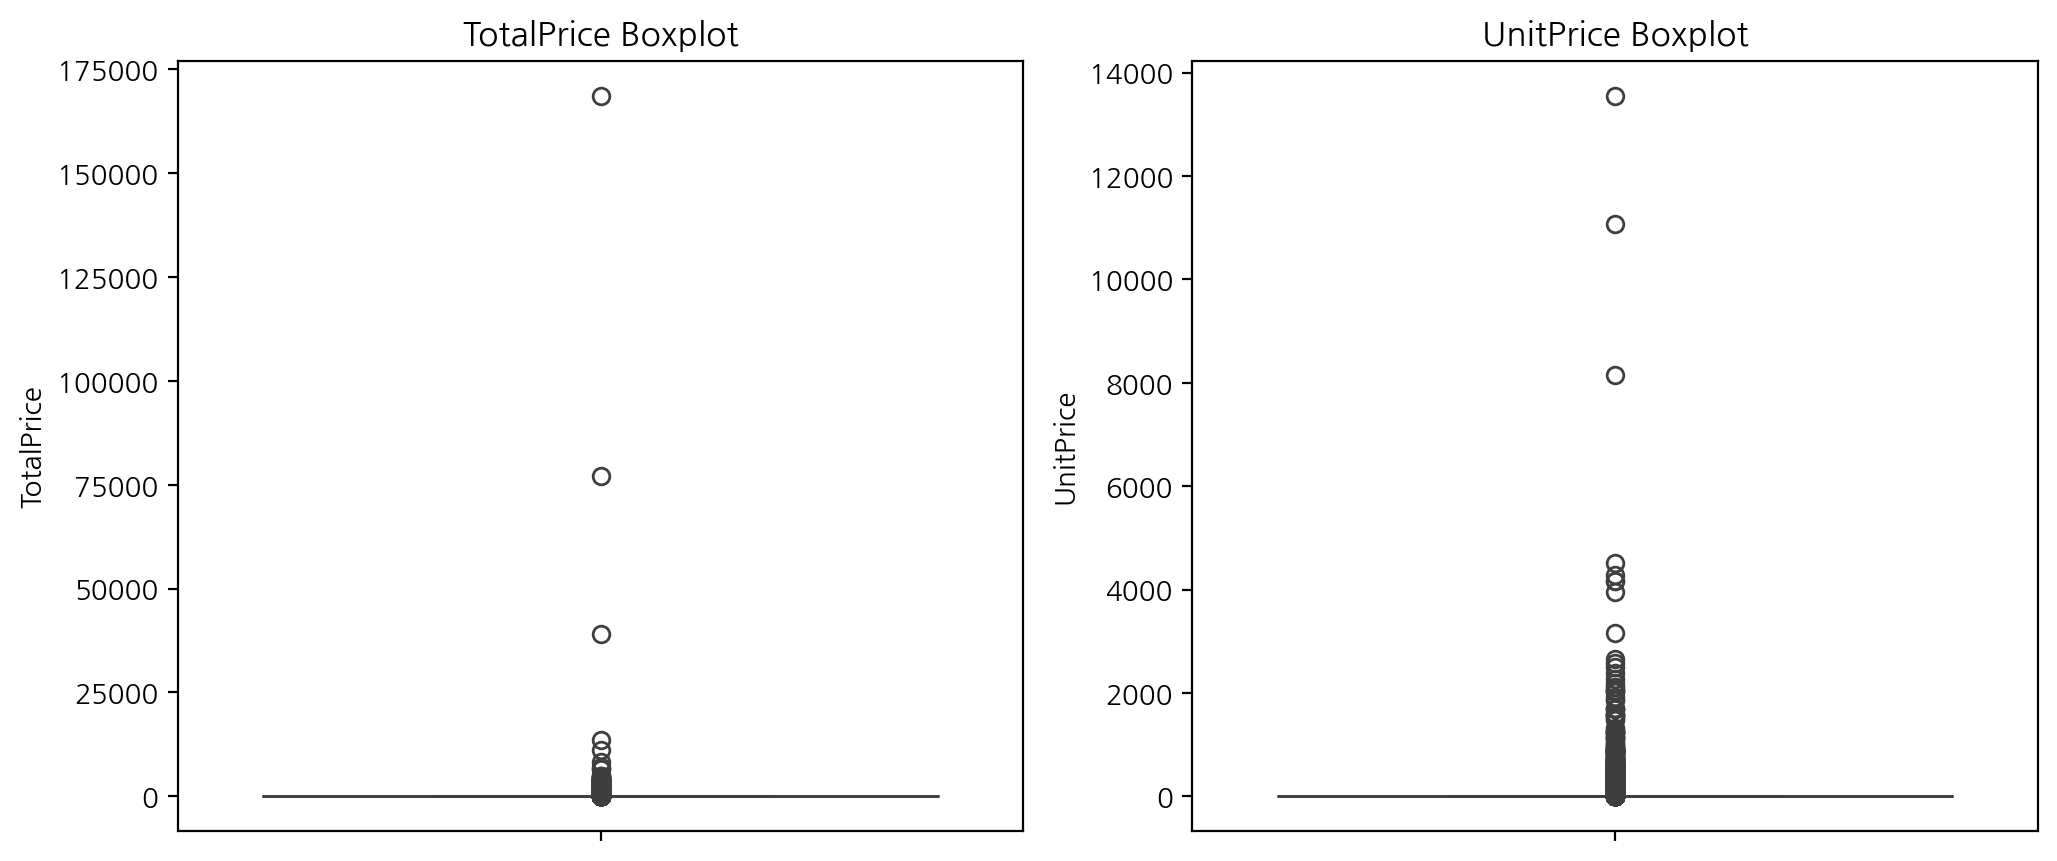

In [280]:
f, ax = plt.subplots(1, 2, figsize = (12, 5) )
sns.boxplot(data = df, y = 'TotalPrice', ax = ax[0])
ax[0].set_title('TotalPrice Boxplot')
sns.boxplot(data = df, y = 'UnitPrice', ax = ax[1])
ax[1].set_title('UnitPrice Boxplot')

In [281]:
# Removing outliers of TotalPrice based on the 3-sigma rule

mean = df['TotalPrice'].mean()
std = df['TotalPrice'].std()

df = df[(df['TotalPrice'] > (mean - 3 * std)) & (df['TotalPrice'] < (mean + 3 * std))]

In [282]:
# Removing outliers of UnitPrice based on the 3-sigma rule

mean = df['UnitPrice'].mean()
std = df['UnitPrice'].std()

df = df[(df['UnitPrice'] > (mean - 3 * std)) & (df['UnitPrice'] < (mean + 3 * std))]

Text(0.5, 1.0, 'UnitPrice Boxplot')

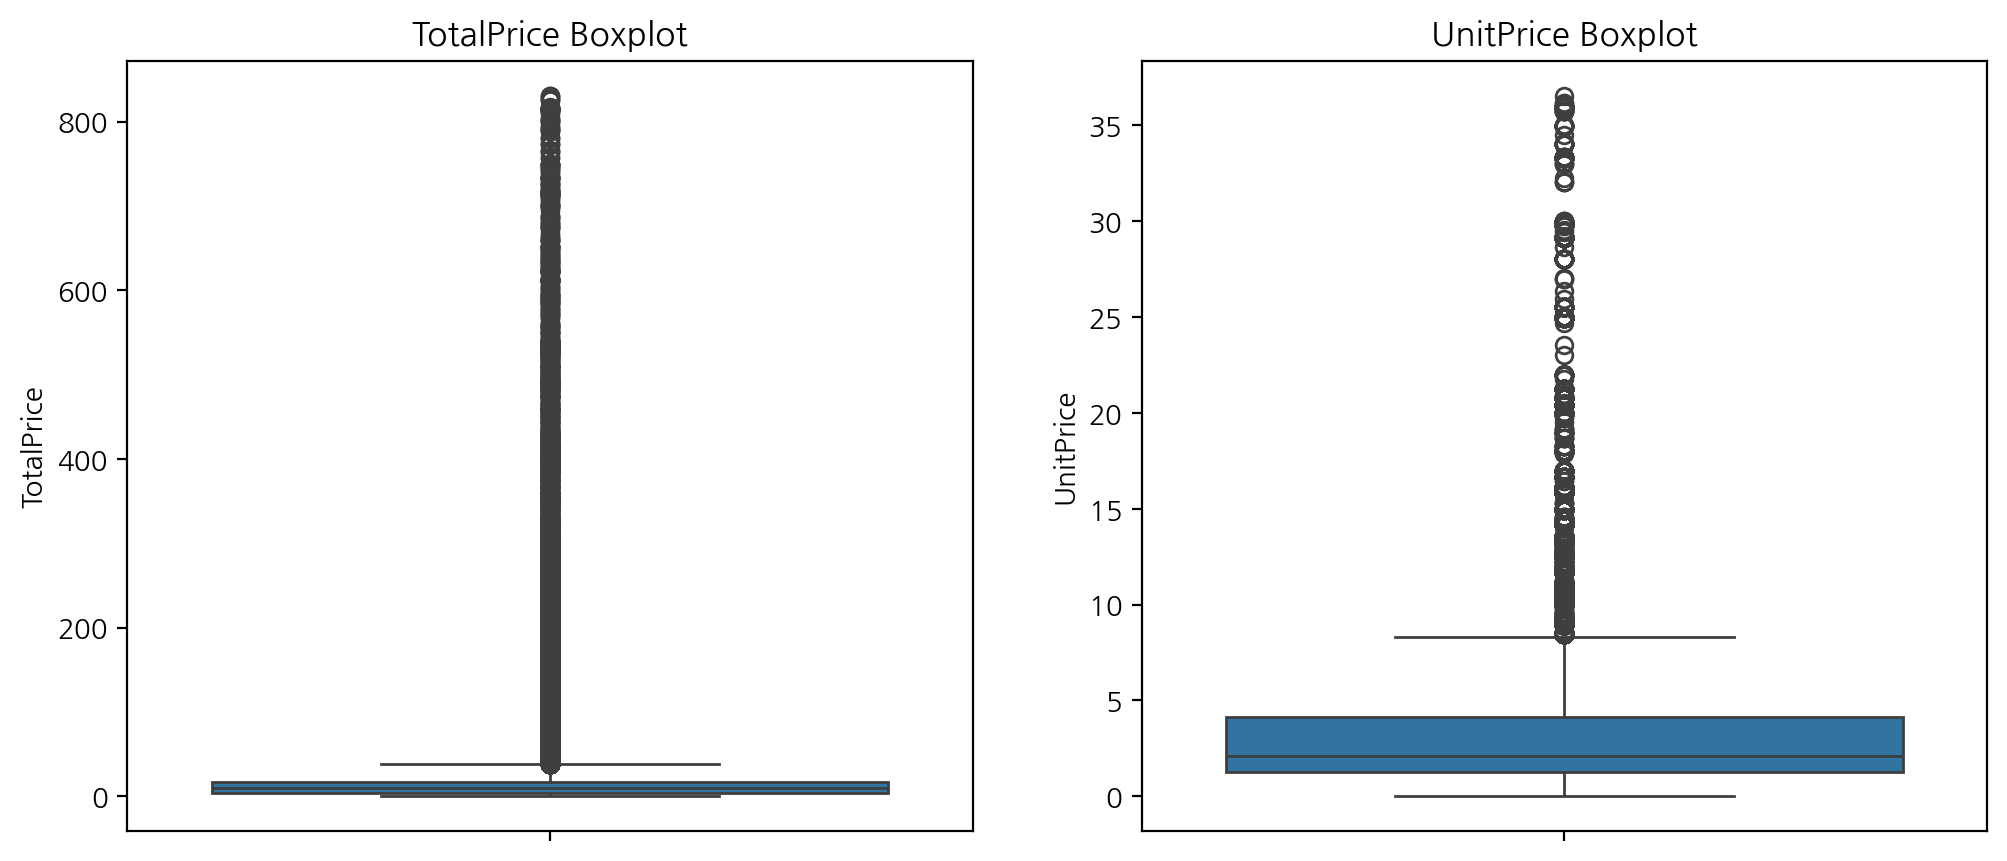

In [283]:
f, ax = plt.subplots(1, 2, figsize = (12, 5) )
sns.boxplot(data = df, y = 'TotalPrice', ax = ax[0])
ax[0].set_title('TotalPrice Boxplot')
sns.boxplot(data = df, y = 'UnitPrice', ax = ax[1])
ax[1].set_title('UnitPrice Boxplot')

In [284]:
# Changing data type of 'Country' column to string
df["Country"] = df["Country"].astype(str)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528203 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     528203 non-null  category      
 1   StockCode     528203 non-null  category      
 2   Description   528203 non-null  category      
 3   Quantity      528203 non-null  int32         
 4   InvoiceDate   528203 non-null  datetime64[ns]
 5   UnitPrice     528203 non-null  float64       
 6   CustomerID    396825 non-null  float32       
 7   Country       528203 non-null  object        
 8   InvoiceMonth  528203 non-null  int32         
 9   year_week     528203 non-null  object        
 10  TotalPrice    528203 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(2), object(2)
memory usage: 34.8+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [286]:
# Grouping by 'Country' 
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
df_country_group = df[df['Country'].isin(country_group)]

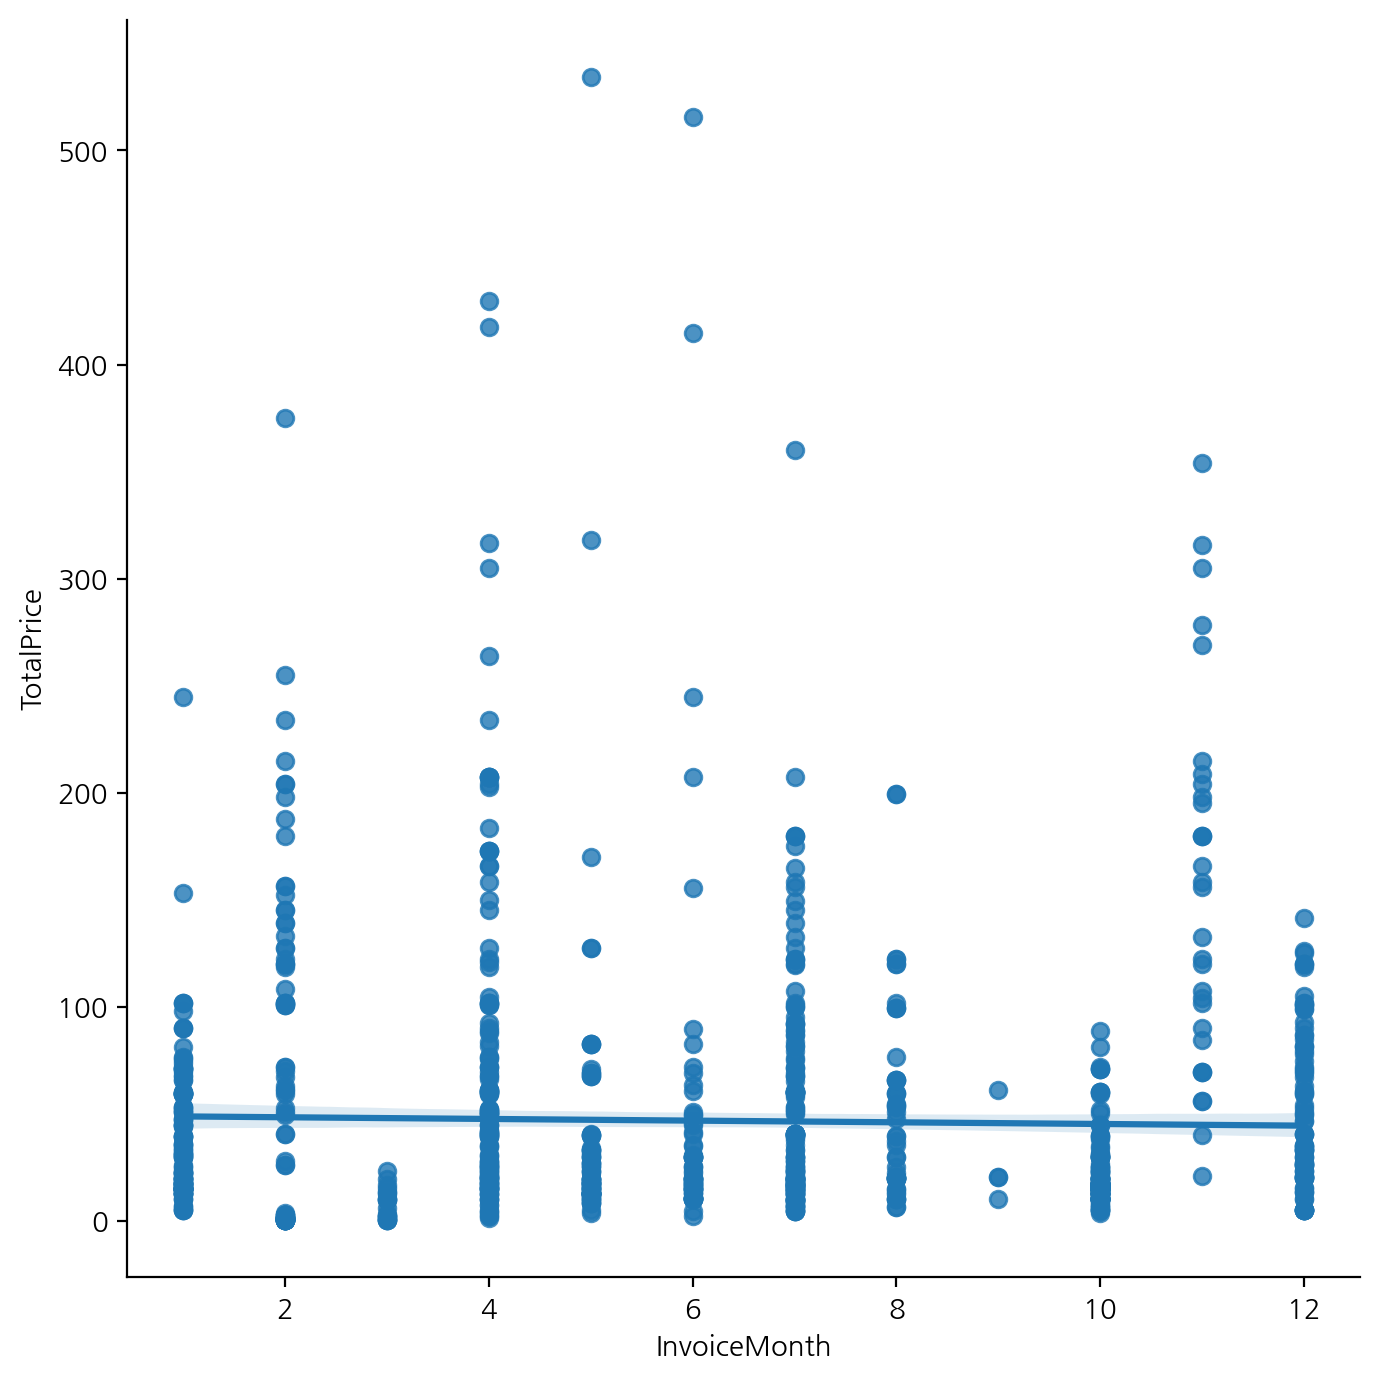

In [287]:
# Regression plot for TotalPrice
sns.lmplot(data = df_country_group, x = "InvoiceMonth", y = "TotalPrice", height = 7)

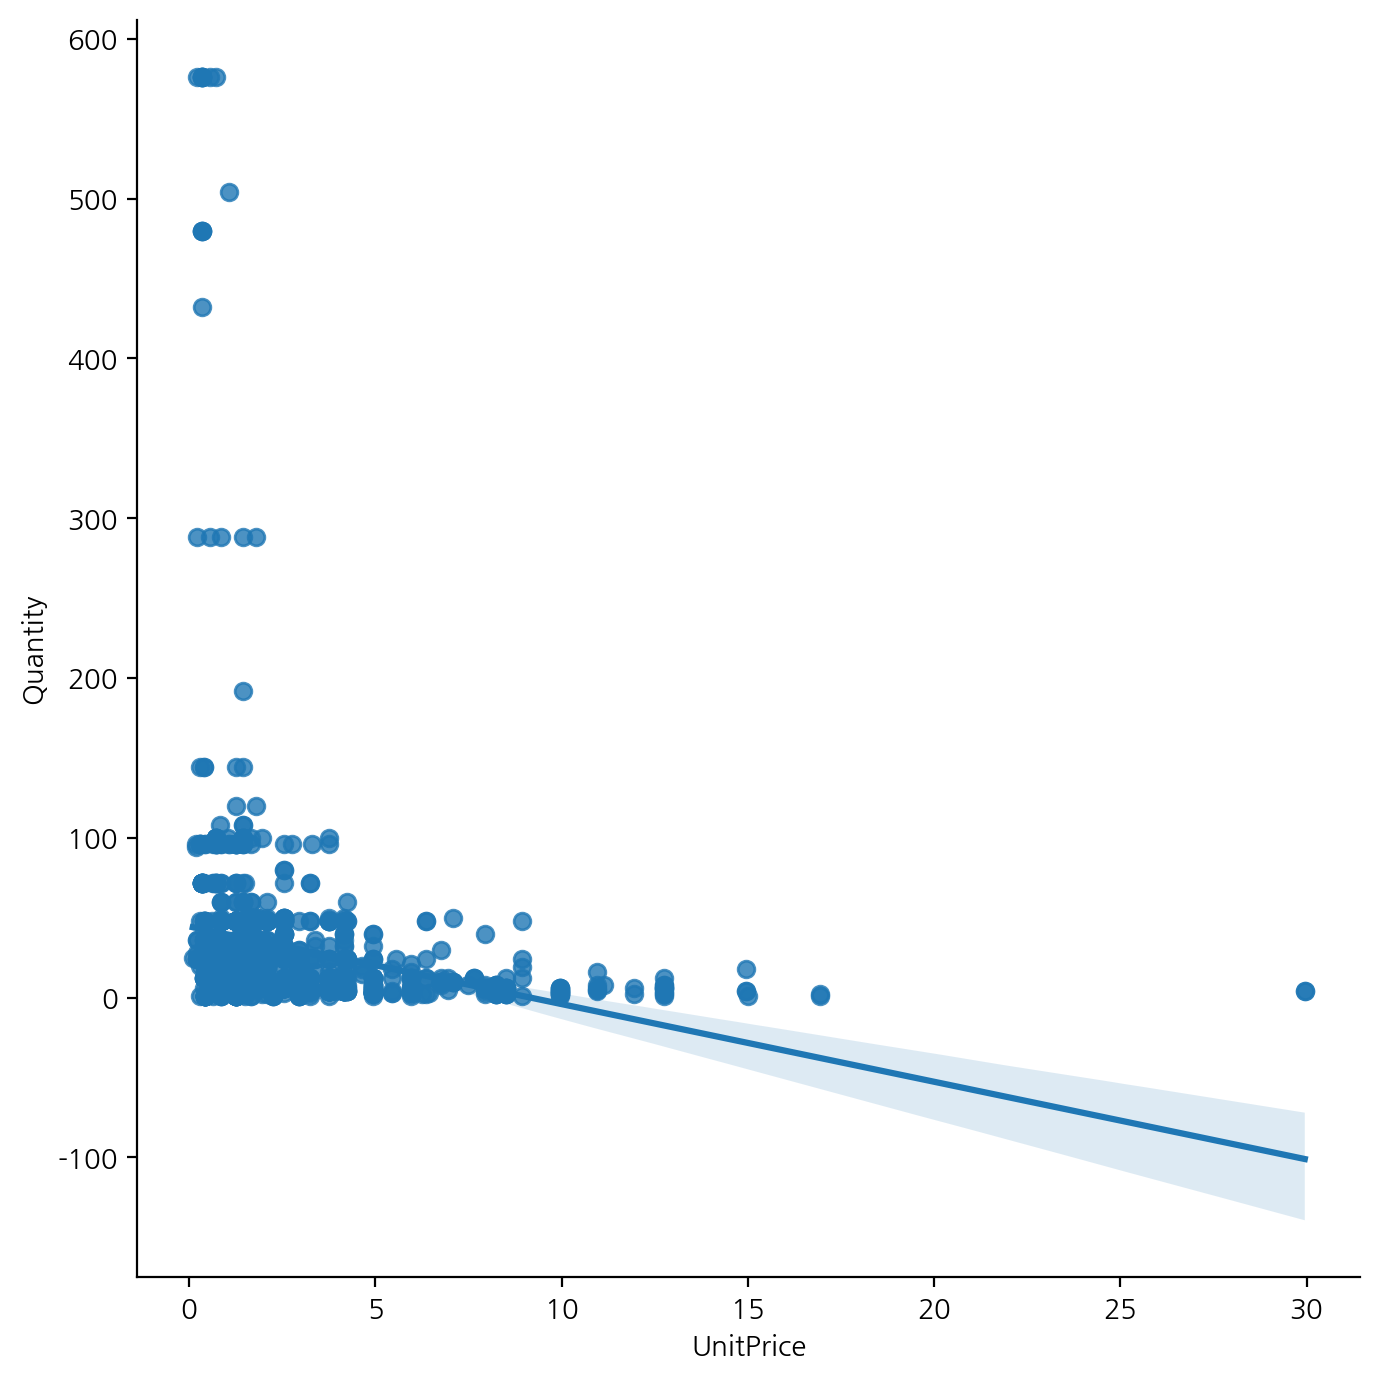

In [288]:
sns.lmplot(data = df_country_group, x = "UnitPrice", y = "Quantity", height = 7)

In [296]:
df_country_group_all = df_country_group.copy()
df_country_group_all["Country"] = "all"
df_all = pd.concat([df_country_group_all, df_country_group])
df_all["Country"].value_counts()

Country
all          1185
Japan         318
Hong Kong     280
Singapore     213
USA           179
Canada        150
Lebanon        45
Name: count, dtype: int64

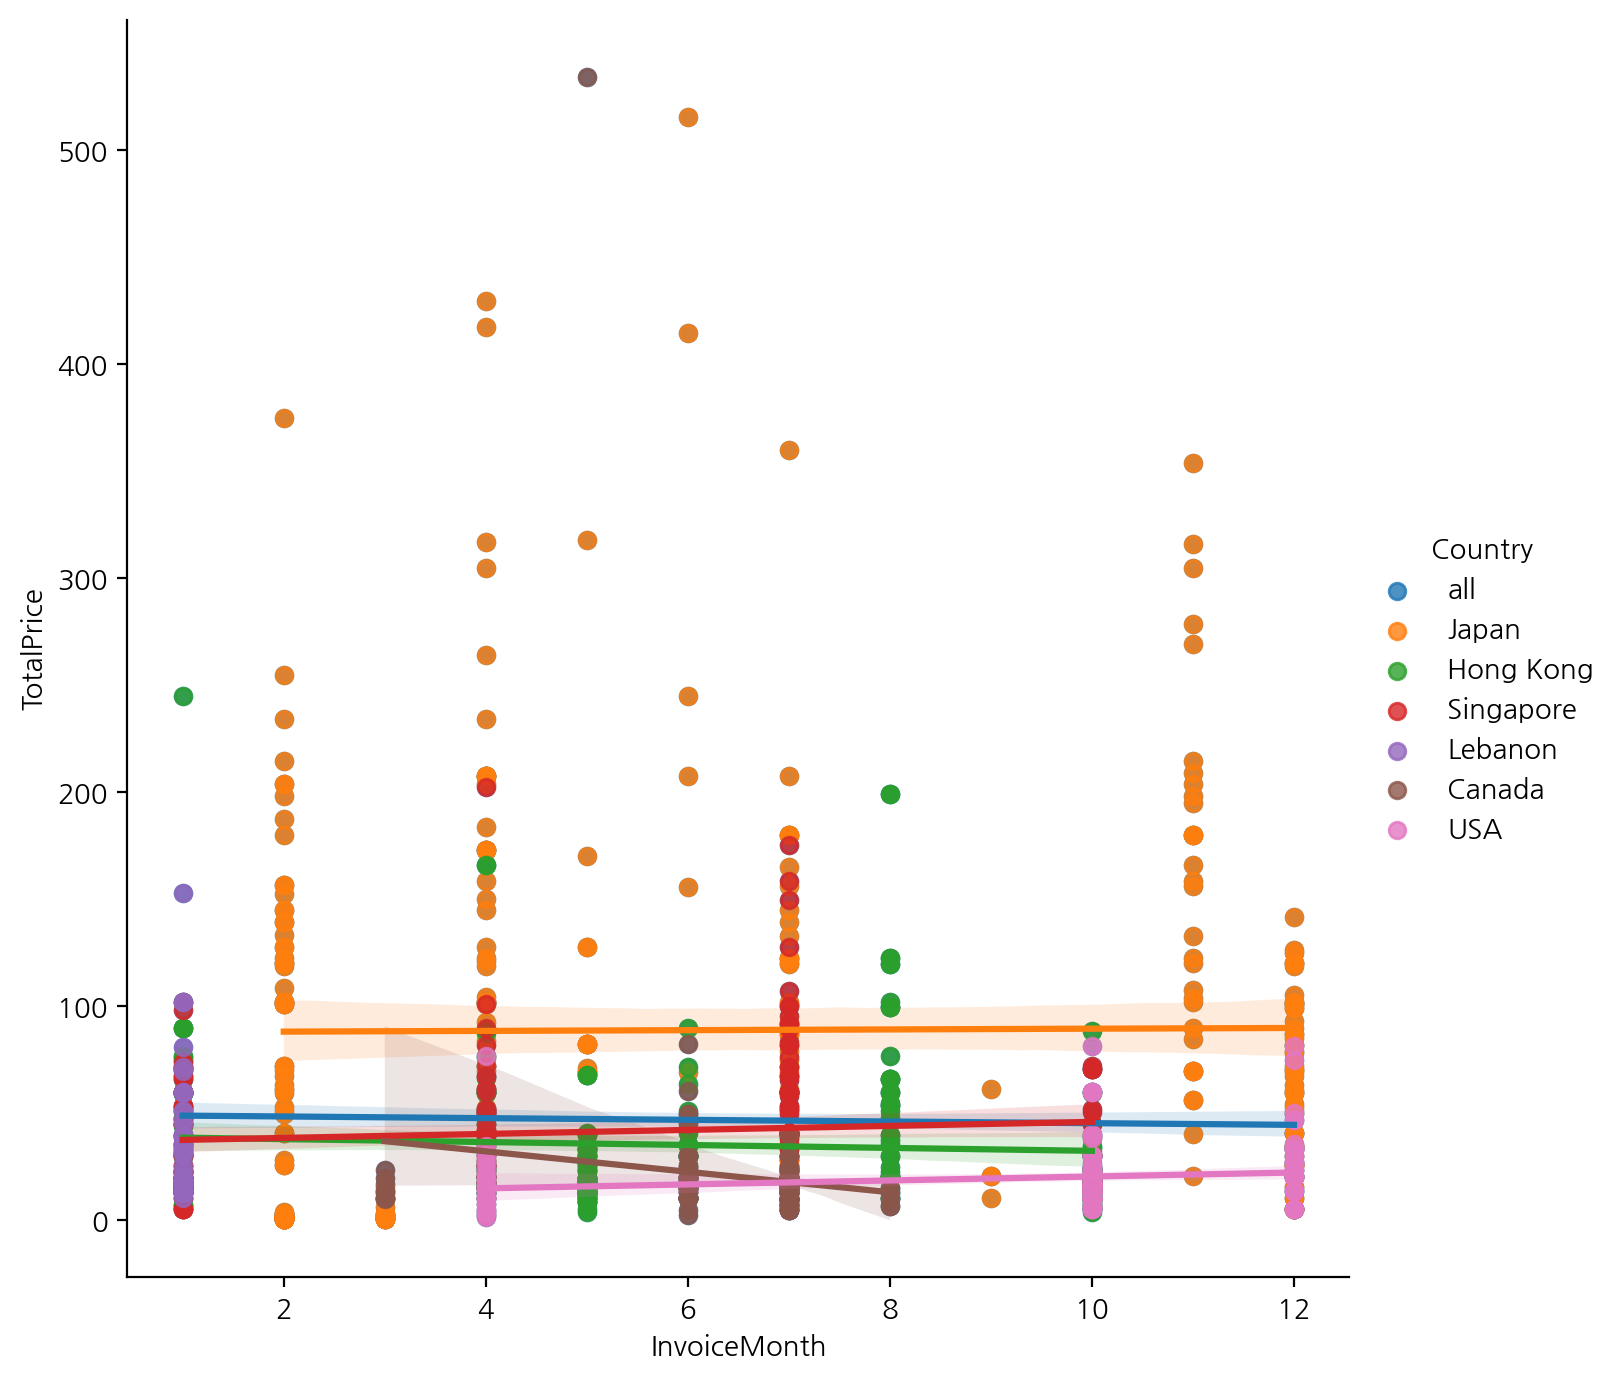

In [297]:
sns.lmplot(data = df_all, x = "InvoiceMonth", y = "TotalPrice", hue = 'Country',height = 7)

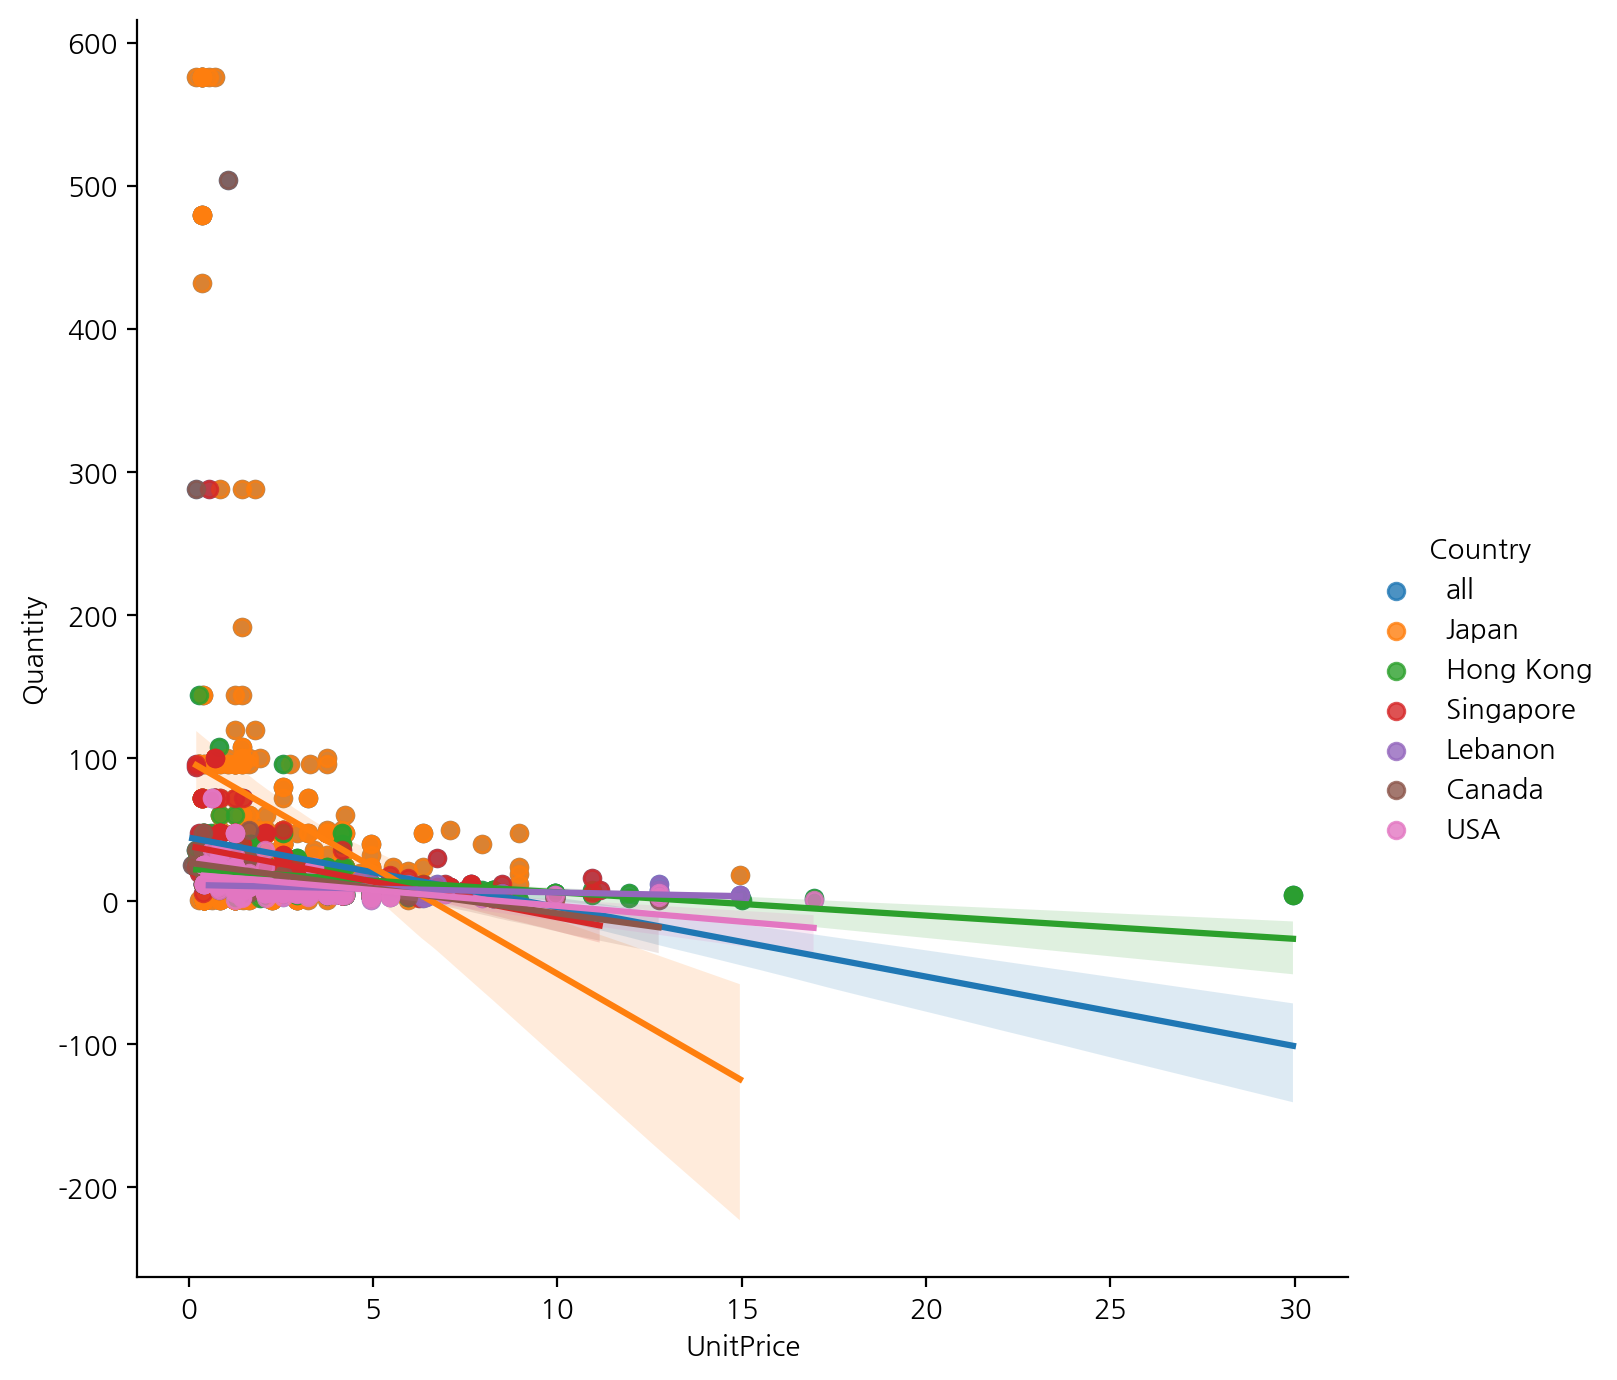

In [299]:
sns.lmplot(data = df_all, x = "UnitPrice", y = "Quantity", hue = 'Country', height = 7)

In [300]:
corr_country = df_all.groupby('Country')[['InvoiceMonth', 'TotalPrice']].corr()
corr_country

InvoiceMonth  TotalPrice
Country                                         
Canada    InvoiceMonth      1.000000   -0.116471
          TotalPrice       -0.116471    1.000000
Hong Kong InvoiceMonth      1.000000   -0.059140
          TotalPrice       -0.059140    1.000000
Japan     InvoiceMonth      1.000000    0.007894
          TotalPrice        0.007894    1.000000
Lebanon   InvoiceMonth           NaN         NaN
          TotalPrice             NaN    1.000000
Singapore InvoiceMonth      1.000000    0.092059
          TotalPrice        0.092059    1.000000
USA       InvoiceMonth      1.000000    0.149076
          TotalPrice        0.149076    1.000000
all       InvoiceMonth      1.000000   -0.023099
          TotalPrice       -0.023099    1.000000

<Axes: ylabel='Country-None'>

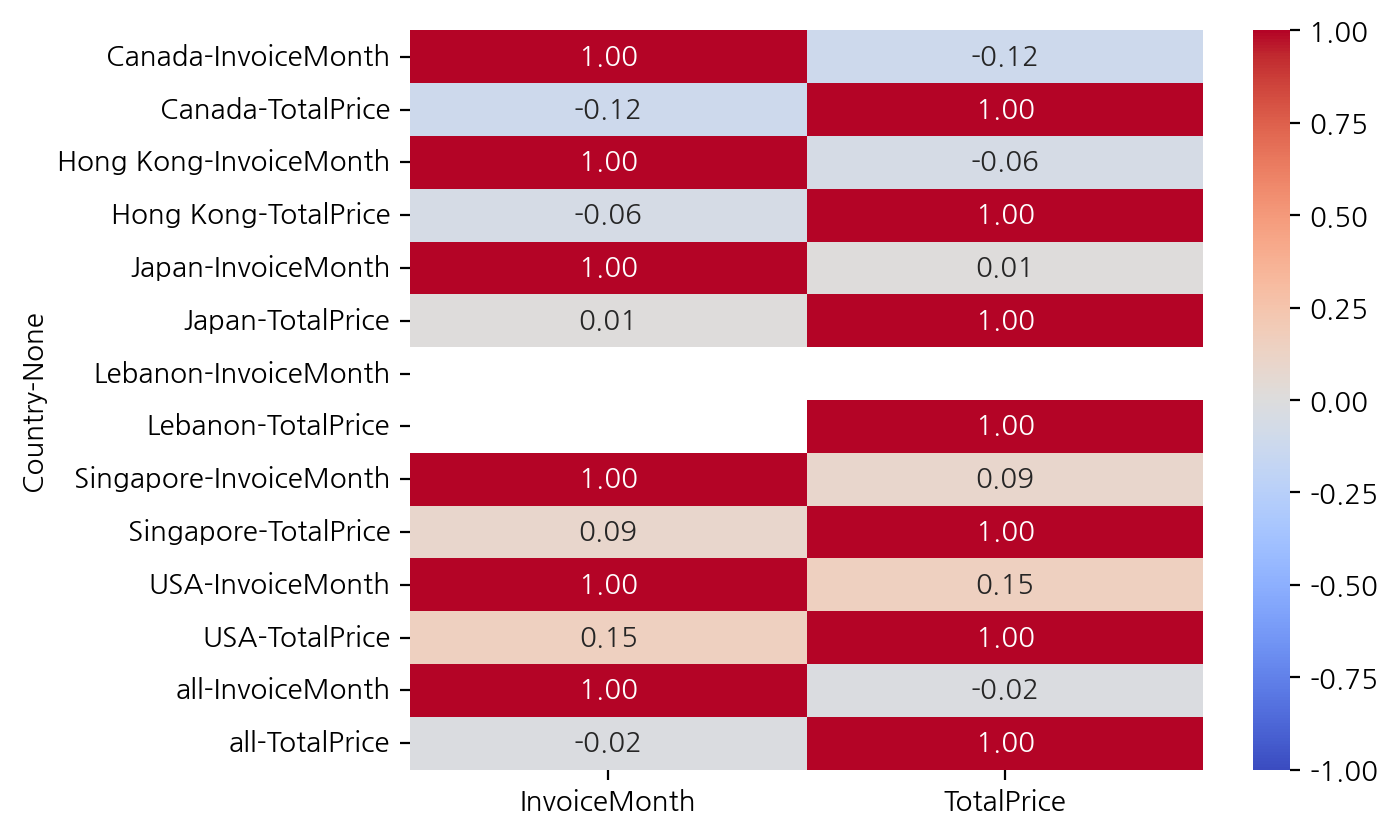

In [301]:
sns.heatmap(corr_country, annot = True, cmap = 'coolwarm', fmt = '.2f', vmin = -1, vmax = 1)

<Axes: ylabel='Country-None'>

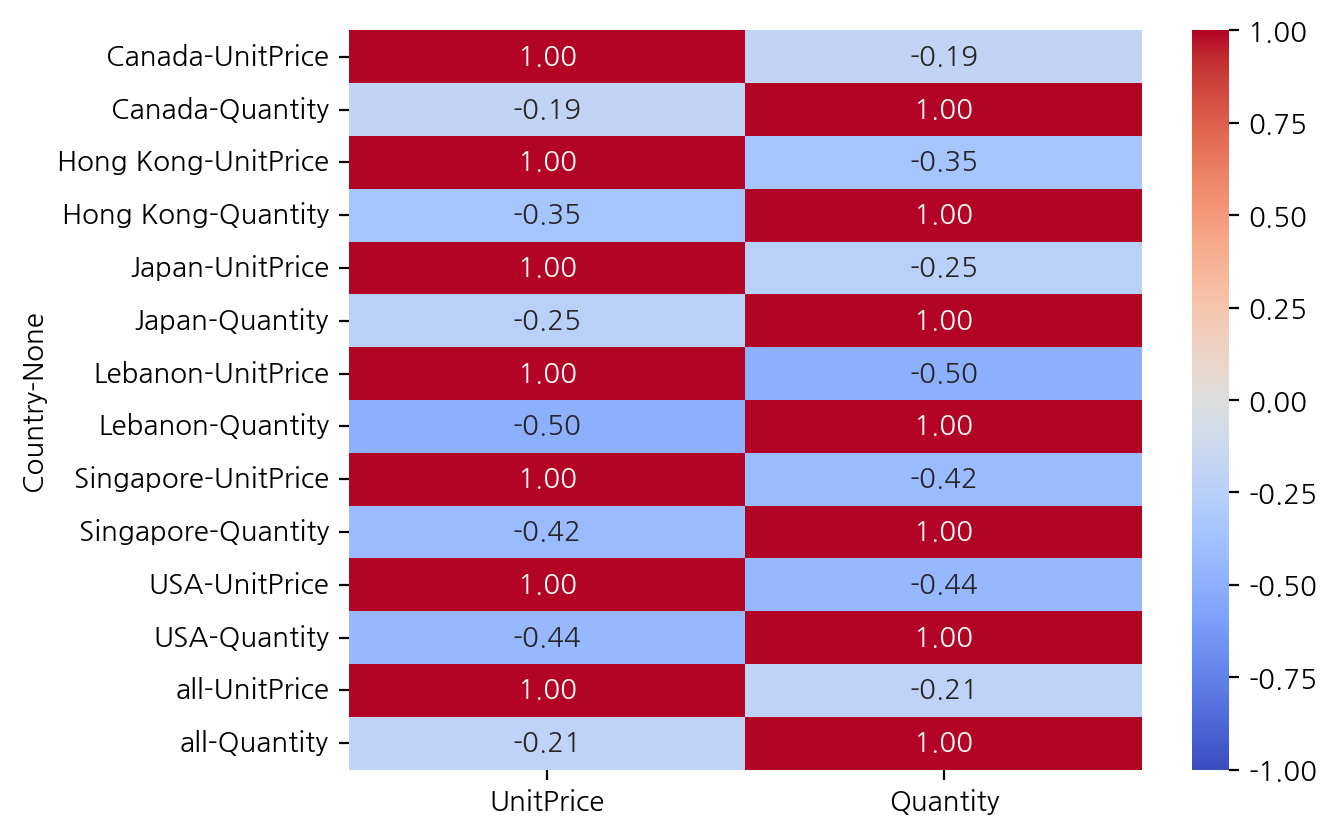

In [303]:
corr_country = df_all.groupby('Country')[['UnitPrice', 'Quantity']].corr()
sns.heatmap(corr_country, annot = True, cmap = 'coolwarm', fmt = '.2f', vmin = -1, vmax = 1)

1. TotalPrice vs. InvoiceMonth in all country have correlation -0.03
2. Likewise, Canada, Hong Kong have similar correlation -0.05 & -0.04
3. However, Japan, Singapore, USA have recording correlation +0.03, +0.03, +0.15 respectively  

## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

<Axes: >

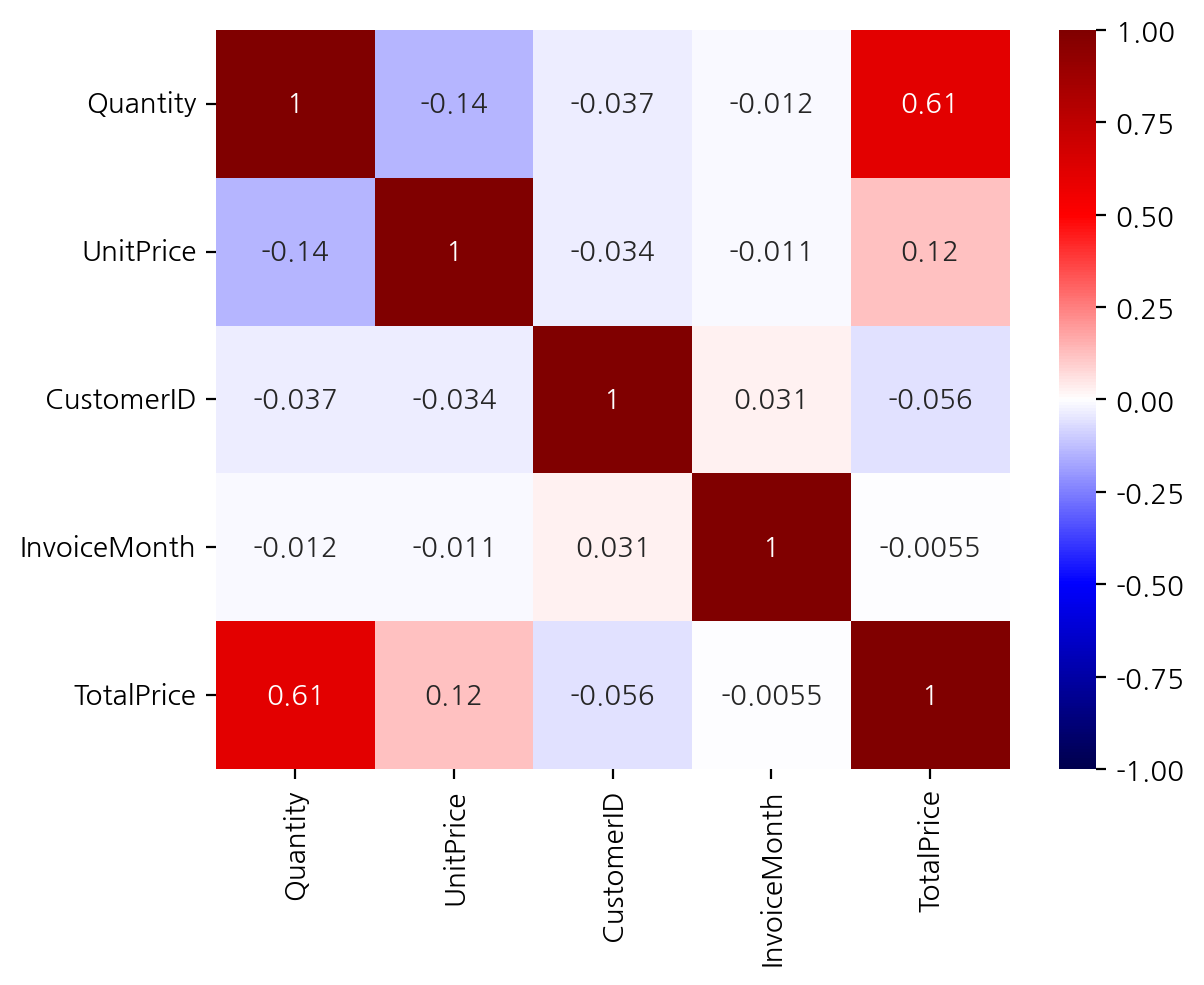

In [304]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="seismic", vmin=-1, vmax=1)

In [305]:
import statsmodels.api as sm
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가
model_ols = sm.OLS(y, X).fit()
model_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     8006.
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:53:58   Log-Likelihood:            -2.6551e+06
No. Observations:              528203   AIC:                         5.310e+06
Df Residuals:                  528201   BIC:                         5.310e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2276      0.070    188.369      0.000      13.090      13.365
UnitPrice      1.3432      0.015     89.474      0.000       1.314       1.373
==============================================================================
Omnibus:                   776810.750   Durbin-Watson:                   0.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        320651242.161
Skew:                           9.044   Prob(JB):                         0.00
Kurtosis:                     122.341   Cond. No.                         6.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

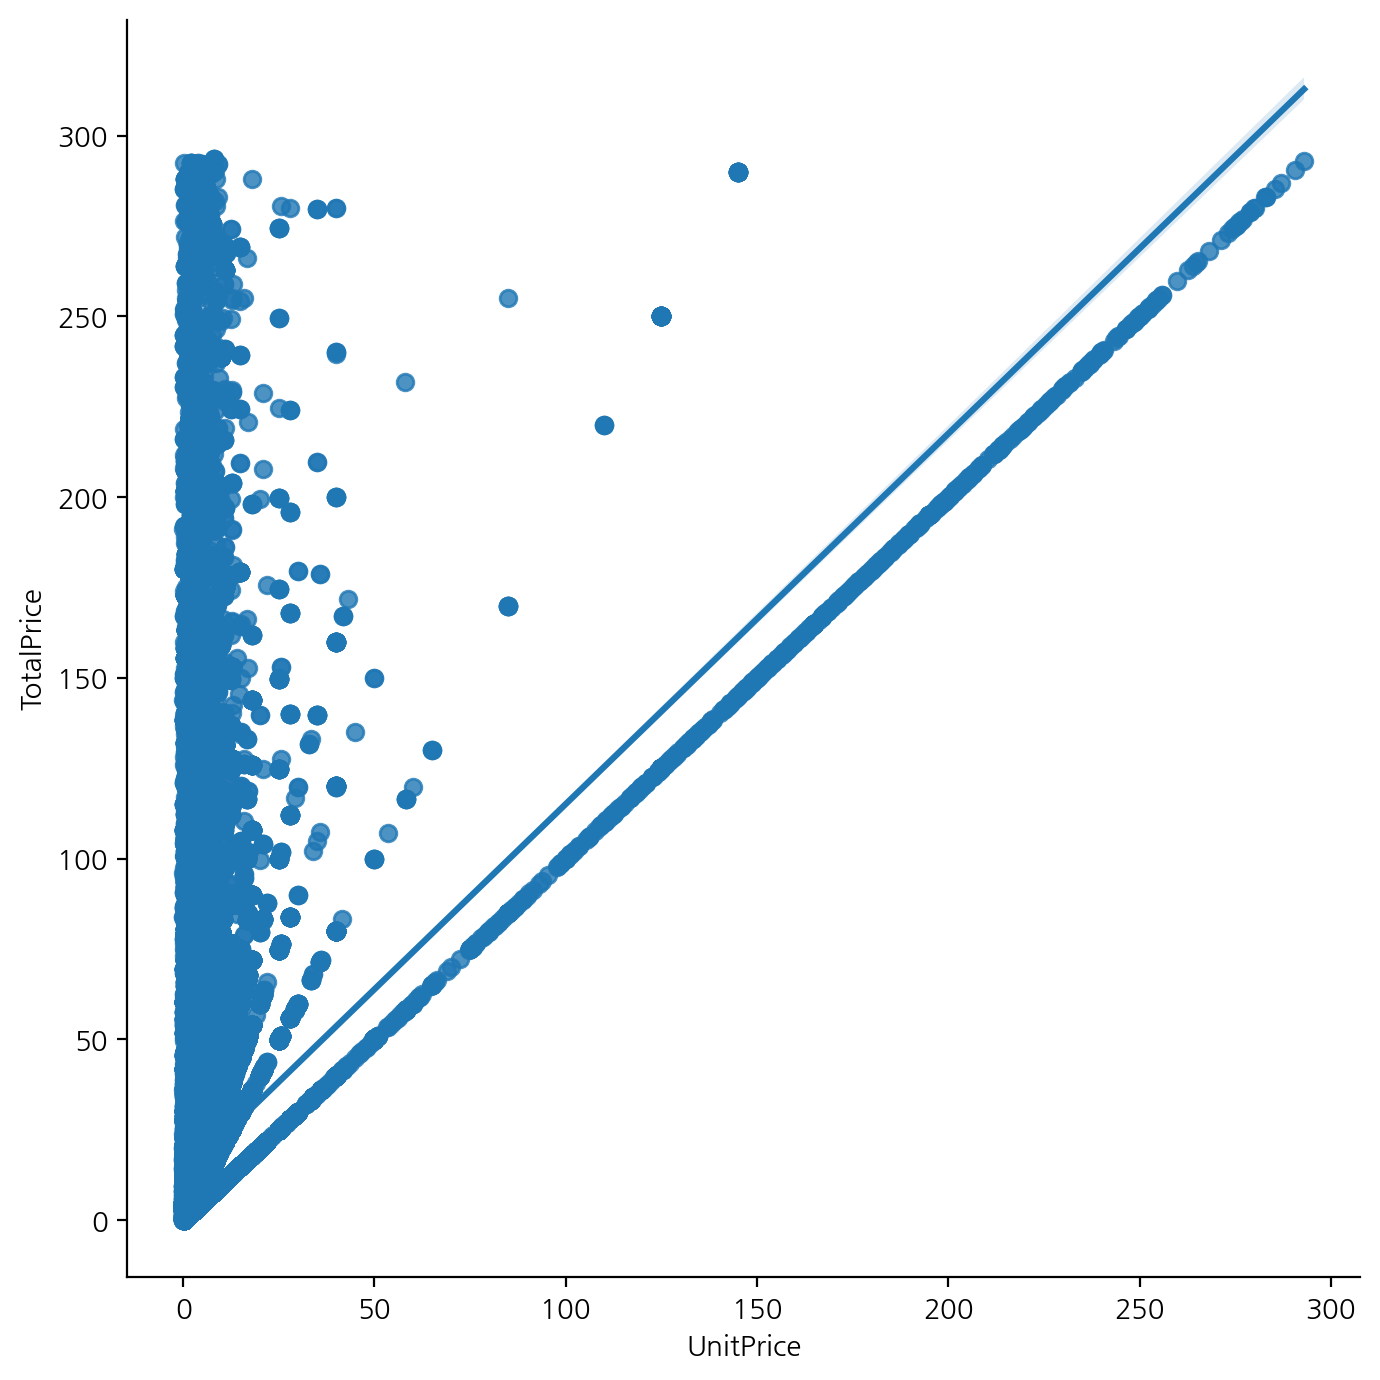

In [69]:
sns.lmplot(data = df, x = "UnitPrice", y = "TotalPrice", height = 7)

In [75]:
df.groupby('Quantity').count()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
Quantity,,,,,,,,,
1,147592,147592,147592,147592,147592,73240,147592,147592,147592
2,81697,81697,81697,81697,81697,57997,81697,81697,81697
3,37035,37035,37035,37035,37035,26946,37035,37035,37035
4,38439,38439,38439,38439,38439,32177,38439,38439,38439
5,11717,11717,11717,11717,11717,8148,11717,11717,11717
...,...,...,...,...,...,...,...,...,...
1296,3,3,3,3,3,3,3,3,3
1440,6,6,6,6,6,6,6,6,6
1600,1,1,1,1,1,1,1,1,1


In [76]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
count,527464.000000,527464,527464.000000,395718.000000,527464.000000,527464.000000
mean,9.060622,2011-07-04 19:38:57.658532352,3.471370,15292.922852,7.559583,16.247004
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000,1.000000,0.001000
25%,1.000000,2011-03-28 12:13:00,1.250000,13969.000000,5.000000,3.750000
50%,3.000000,2011-07-20 12:29:00,2.080000,15157.000000,8.000000,9.900000
75%,10.000000,2011-10-19 12:39:00,4.130000,16794.000000,11.000000,17.400000
max,3186.000000,2011-12-09 12:50:00,293.000000,18287.000000,12.000000,293.400000
std,23.322674,NaN,6.949456,1711.962280,3.509137,26.180226


1. As there are many record with 1 Quantity (28%), same values in UnitPrice and TotalPrice are exptected.
2. In accordance, the R-squared between UnitPrice and TotalPrice is calculated 0.074 which is very low. 

## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [123]:
df[df["InvoiceDate"] < "2011-01-01"].sort_values(by = "InvoiceDate", ascending = True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
...,...,...,...,...,...,...,...,...,...,...
42465,539991,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1,2010-12-23 16:49:00,3.75,NaN,United Kingdom,12,3.75
42471,539991,22649,STRAWBERRY FAIRY CAKE TEAPOT,1,2010-12-23 16:49:00,4.95,NaN,United Kingdom,12,4.95
42479,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN,United Kingdom,12,1.25
42478,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN,United Kingdom,12,3.75


In [88]:
df["Description"].notnull()

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: Description, Length: 527464, dtype: bool

In [157]:
df_filtered = df[(df["InvoiceDate"] >= "2010-12-25") & (df["InvoiceDate"] < "2011-01-01")]
df_filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice


In [166]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-18"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

<Axes: ylabel='TotalPrice'>

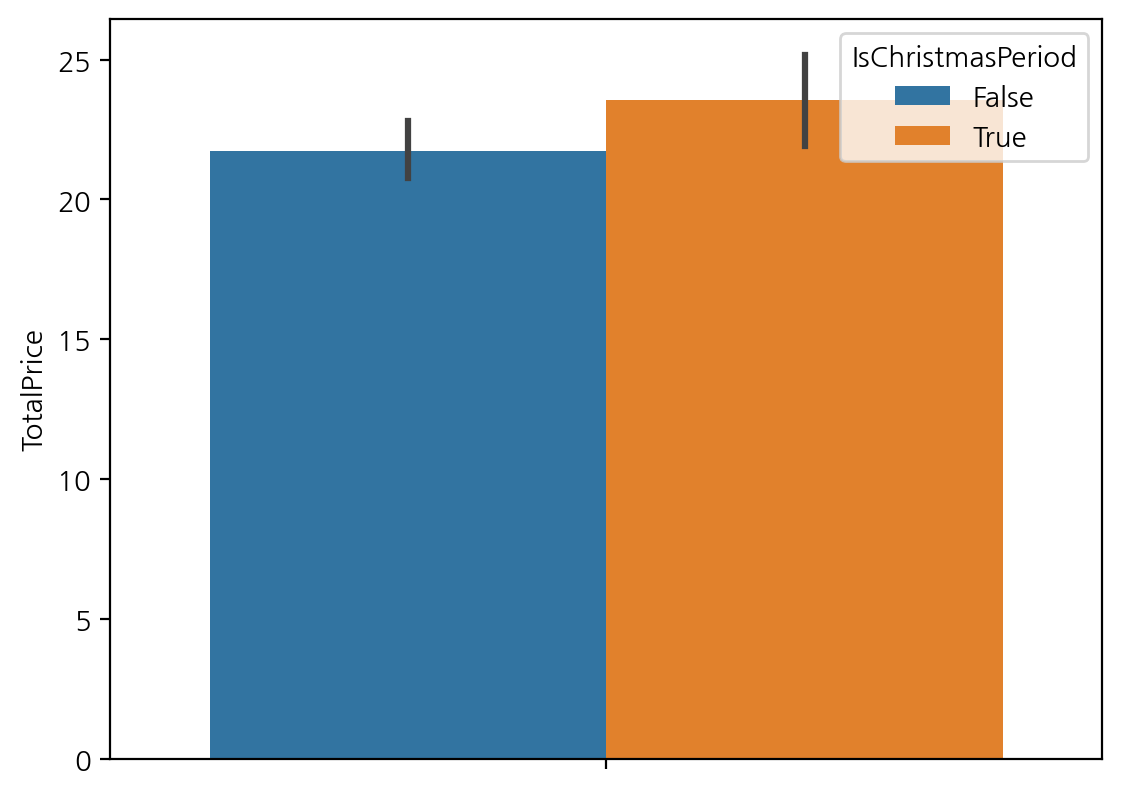

In [167]:
sns.barplot(data = df_promotion, y = 'TotalPrice', hue = 'IsChristmasPeriod')

<Axes: ylabel='TotalPrice'>

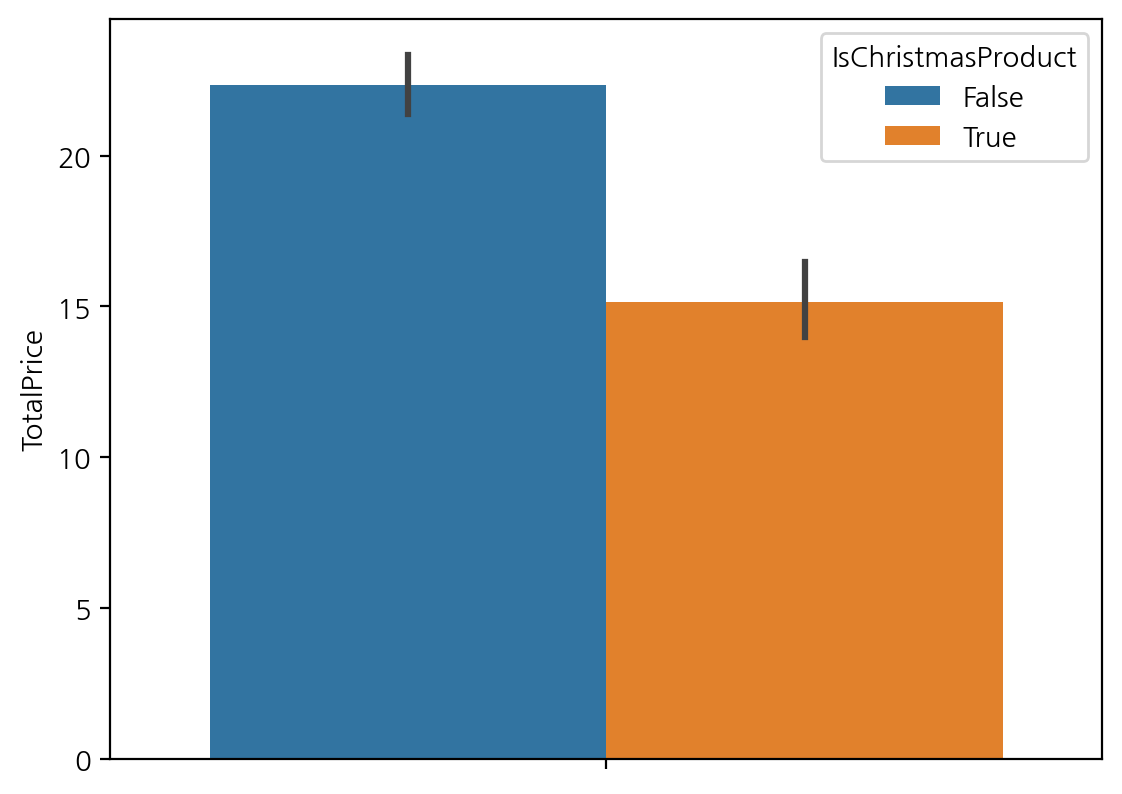

In [168]:
sns.barplot(data = df_promotion, y = 'TotalPrice', hue = 'IsChristmasProduct')

## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [169]:
import statsmodels.formula.api as smf

In [206]:
# 다변량 회귀분석
df_ols = df_promotion[['Quantity', 'IsChristmasProduct', 'UnitPrice', 'Country']]
df_ols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26157 entries, 0 to 42452
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quantity            26157 non-null  int32  
 1   IsChristmasProduct  26157 non-null  bool   
 2   UnitPrice           26157 non-null  float64
 3   Country             26157 non-null  object 
dtypes: bool(1), float64(1), int32(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# Convert 'IsChristmasProduct' to int
df_ols['IsChristmasProduct'] = df_ols['IsChristmasProduct'].astype(int)

In [185]:
df_encoded = pd.get_dummies(df_ols, columns=['Country', 'IsChristmasProduct'], drop_first=True)

In [186]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26157 entries, 0 to 42452
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Quantity                 26157 non-null  int32  
 1   UnitPrice                26157 non-null  float64
 2   Country_Austria          26157 non-null  bool   
 3   Country_Belgium          26157 non-null  bool   
 4   Country_Channel Islands  26157 non-null  bool   
 5   Country_Cyprus           26157 non-null  bool   
 6   Country_Denmark          26157 non-null  bool   
 7   Country_EIRE             26157 non-null  bool   
 8   Country_Finland          26157 non-null  bool   
 9   Country_France           26157 non-null  bool   
 10  Country_Germany          26157 non-null  bool   
 11  Country_Iceland          26157 non-null  bool   
 12  Country_Italy            26157 non-null  bool   
 13  Country_Japan            26157 non-null  bool   
 14  Country_Lithuania        26

<Axes: >

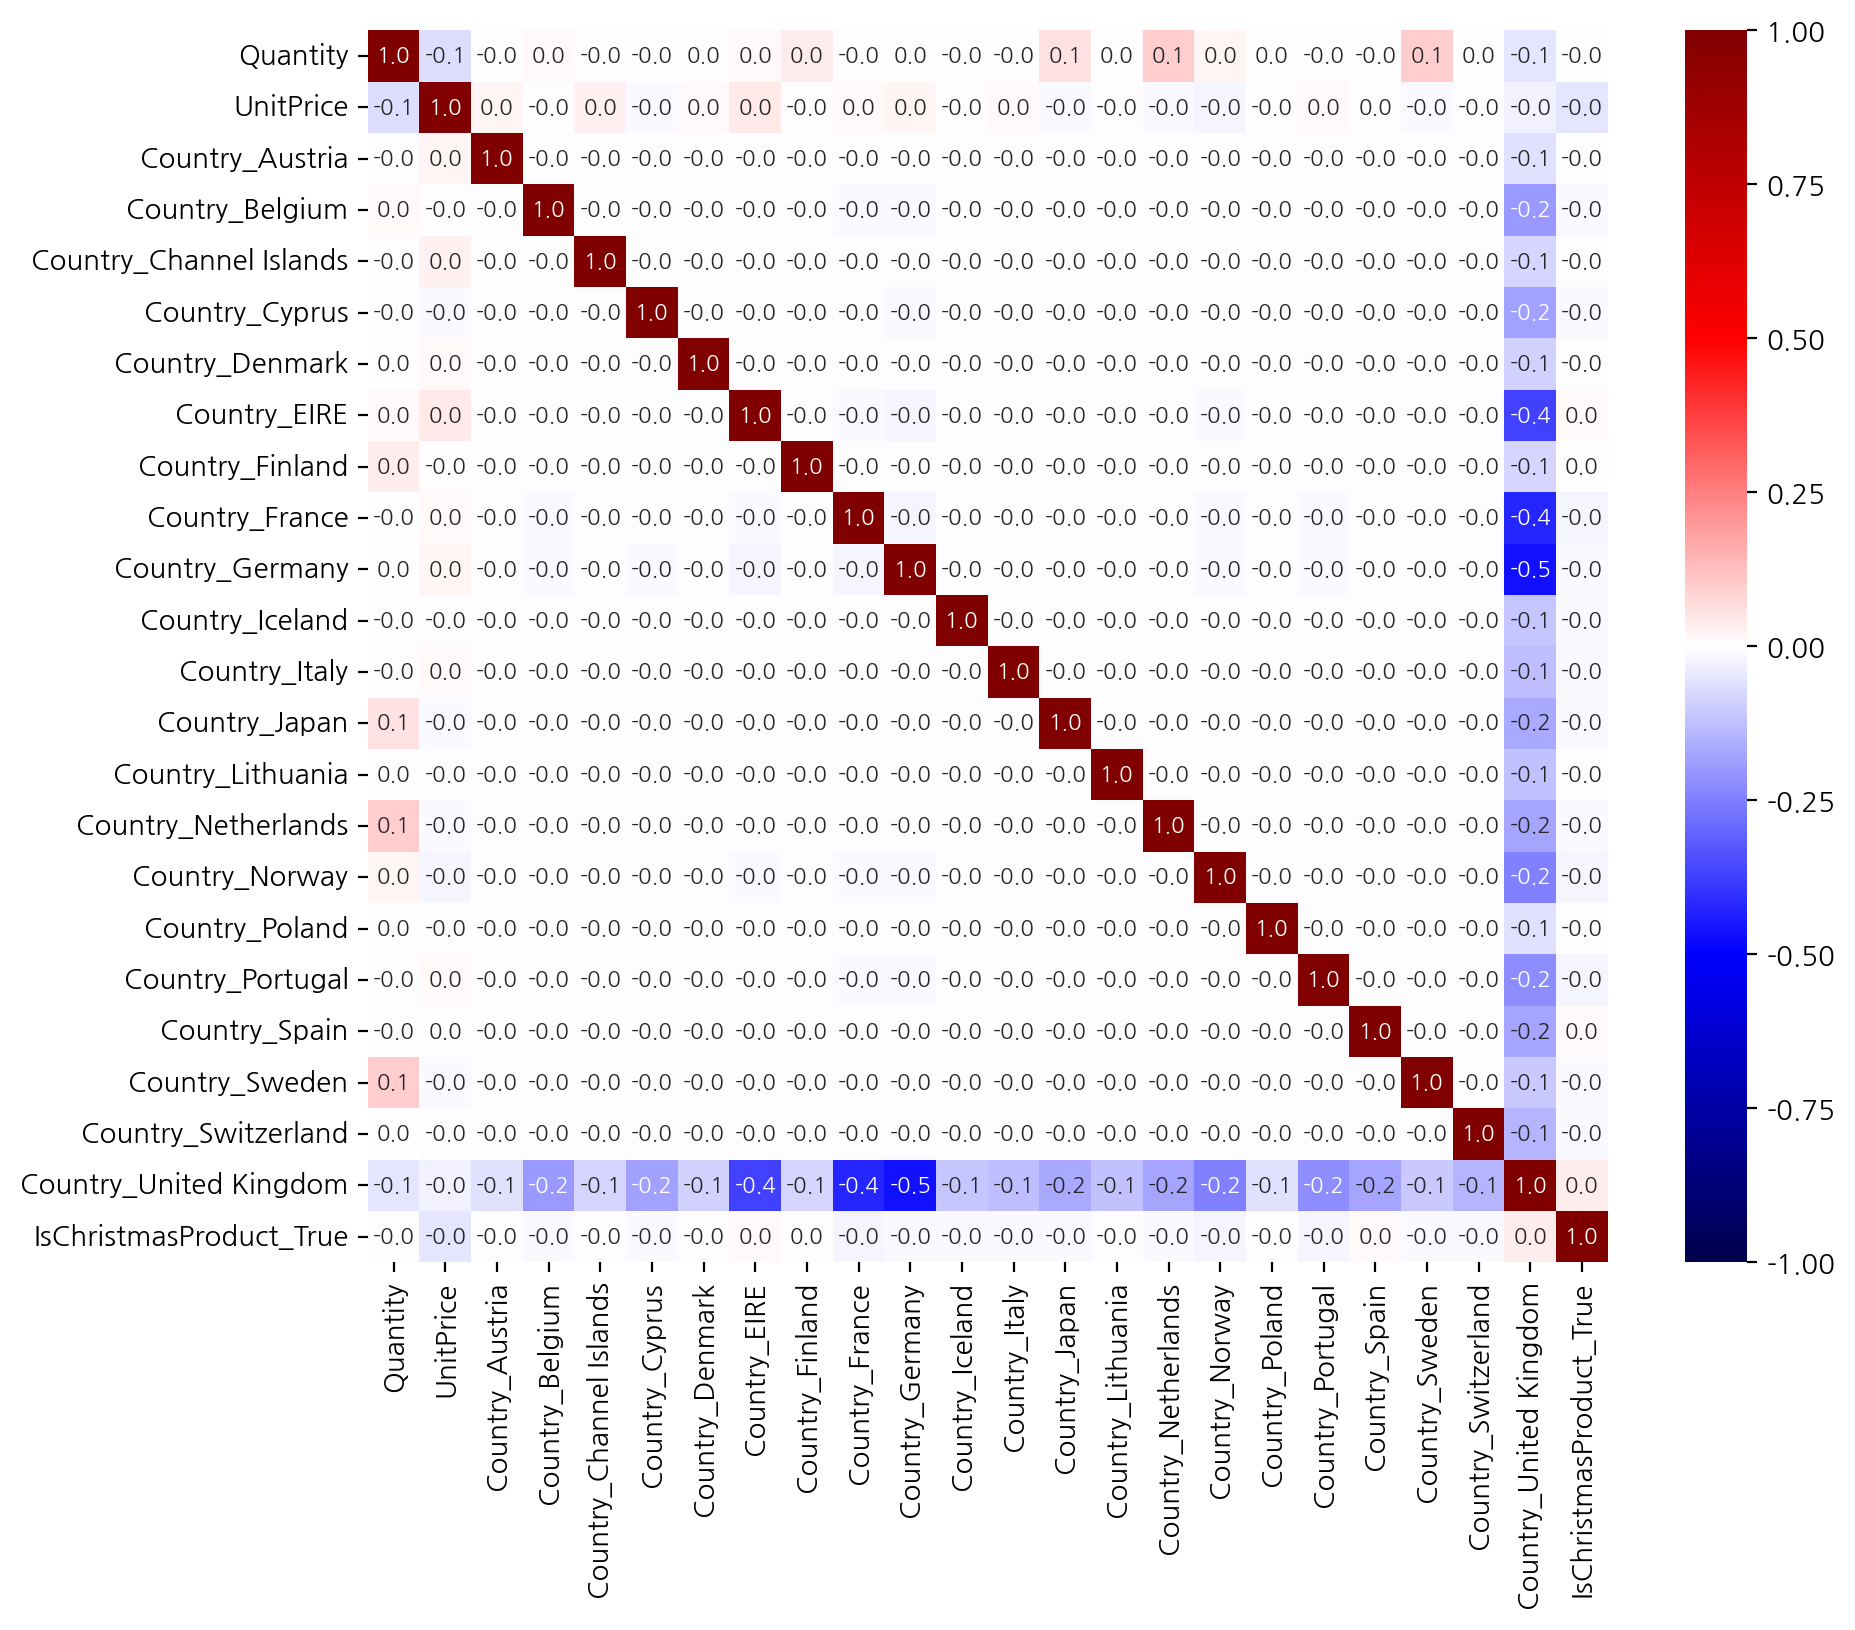

In [194]:
corr = df_encoded.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="seismic", vmin=-1, vmax=1, annot_kws={"size": 8}, fmt=".1f" )

In [209]:
# Apply one-hot encoding to 'Country'
df_encoded = pd.get_dummies(df_ols, columns=['Country'])

In [210]:
# Define the predictor variables and the target variable
X = df_encoded.drop('Quantity', axis=1)
y = df_encoded['Quantity']

In [213]:
X.shape, y.shape

((26157, 25), (26157,))

In [216]:
y.info()

<class 'pandas.core.series.Series'>
Index: 26157 entries, 0 to 42452
Series name: Quantity
Non-Null Count  Dtype
--------------  -----
26157 non-null  int32
dtypes: int32(1)
memory usage: 1.3 MB


In [218]:
X = X.astype(float)
y = y.astype(float)
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()

In [219]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     31.87
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          5.48e-138
Time:                        12:50:36   Log-Likelihood:            -1.3687e+05
No. Observations:               26157   AIC:                         2.738e+05
Df Residuals:                   26133   BIC:                         2.740e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.798e+11   3.95e+12     -0.096      0.923   -8.12e+12    7.37e+12
x1            -0.7749      1.173     -0.661      0.509      -3.073       1.523
x2            -0.5511      0.054    -10.225      0.000      -0.657      -0.445
x3          3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x4          3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x5          3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x6          3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x7          3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x8          3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x9          3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x10         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x11         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x12         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x13         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x14         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x15         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x16         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x17         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x18         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x19         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x20         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x21         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x22         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x23         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
x24         3.798e+11   3.95e+12      0.096      0.923   -7.37e+12    8.12e+12
==============================================================================
Omnibus:                    67557.147   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1893075906.772
Skew:                          29.601   Prob(JB):                         0.00
Kurtosis:                    1319.610   Cond. No.                     4.14e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

Target
False    6720
True     2028
Name: count, dtype: int64

In [201]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']


In [220]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.27      0.88      0.41      1224
         2.0       0.23      0.01      0.02       739
         3.0       0.00      0.00      0.00       335
         4.0       0.11      0.01      0.01       386
         5.0       0.00      0.00      0.00       122
         6.0       0.09      0.01      0.01       499
         7.0       0.00      0.00      0.00        19
         8.0       0.00      0.00      0.00       159
         9.0       0.00      0.00      0.00        22
        10.0       0.00      0.00      0.00       159
        11.0       0.00      0.00      0.00         3
        12.0       0.21      0.32      0.25       733
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.00      0.00         3
        16.0       0.00      0.00      0.00        46
        17.0       0.00      0.00      0.00         1
        18.0       0.00    

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precis